# Задача

[LINK](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+MFTIDS-1sem+2024/block-v1:Skillfactory+MFTIDS-1sem+2024+type@sequential+block@a7223c27054645029baf6f2bd8ee5a85/block-v1:Skillfactory+MFTIDS-1sem+2024+type@vertical+block@f5e3d56727f54584afd1aa317788168f)


# «Умный городской гид». Описание
Проблема

Опыт пребывания в музее, городе или новом месте не всегда является интересным и увлекательным для посетителей. Часто люди ощущают неудовлетворенность или скучают, так как им не хватает информации, персонализированности или интерактивности. Это может привести к утрате интереса и негативному впечатлению от посещения места.

Дополнительно посетителям может быть сложно ориентироваться в больших комплексах, музеях или городах, особенно если у них ограниченное знание или понимание о предлагаемых экспозициях, достопримечательностях или культуре места. Это ограничение может привести к пропуску важной информации или упущению интересных возможностей во время посещения.

Следовательно, существует потребность в улучшении опыта пребывания людей в музее, городе или новом месте.










# Import

In [1]:
import json
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Рассчитываем среднюю длину текста в каждом из столбцов (название, описание, автор)
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KVladimirov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KVladimirov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Read Data

In [3]:
df1 = pd.read_json("../data/scraped/artefact_catalog_data_1_300.json")
df2 = pd.read_json("../data/scraped/artefact_catalog_data_300_756.json")

C:\Users\KVladimirov\AppData\Local\Temp\ipykernel_8412\888602706.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df1 = pd.read_json("../data/scraped/artefact_catalog_data_1_300.json")
C:\Users\KVladimirov\AppData\Local\Temp\ipykernel_8412\888602706.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df1 = pd.read_json("../data/scraped/artefact_catalog_data_1_300.json")
C:\Users\KVladimirov\AppData\Local\Temp\ipykernel_8412\888602706.py:1: FutureWarning: The behavior of 'to_date

In [4]:
artefact_catalog_df = pd.concat([df1, df2])

In [5]:
artefact_catalog_df.columns

Index(['title', 'authors', 'creation_time', 'size', 'technique', 'collection',
       'exhibition', 'description', 'url'],
      dtype='object')

In [6]:
artefact_catalog_df.head()

,title,authors,creation_time,size,technique,collection,exhibition,description,url
0,Бриг «Меркурий»,"[Айвазовский И.К., Айвазовский И.К.]",1848,"123,5x190 см","Холст, масло",Государственный Русский музей,Иван Константинович Айвазовский,И.К. Айвазовский Бриг «Меркурий» после победы ...,https://ar.culture.ru/ru/subject/brig-merkuriy-1
1,Буря у мыса Айя,"[Айвазовский И.К., Айвазовский И.К.]",1875,215x325 см,"Холст, масло",Государственный Русский музей,Иван Константинович Айвазовский,И.К. Айвазовский Буря у мыса Айя Картина писал...,https://ar.culture.ru/ru/subject/burya-u-mysa-...
2,Подружки,"[Сычков Ф.В., Сычков Ф.В.]",1909 год,"86,8x57,5 см","Холст, масло",Ярославский художественный музей,Три века русской живописи,Сычков Ф. В. Подружки О картине Картину «Подру...,https://ar.culture.ru/ru/subject/podruzhki
3,Аллегория бренности,"[Петер ван дер Виллиге, Петер ван дер Виллиге]",вторая половина XVII века,111x85 см,"холст, масло",ГМИИ им. А.С. Пушкина,Предмет – Образ – Смысл,Виллиге Петер ван дер Аллегория бренности Карт...,https://ar.culture.ru/ru/subject/allegoriya-br...
4,Березовая роща,"[Шишкин И.И., Шишкин И.И.]",1896 год,"105,8x69,8 см","Холст, масло",Ярославский художественный музей,Три века русской живописи,Шишкин И.И. Березовая роща О картине Иван Шишк...,https://ar.culture.ru/ru/subject/berezovaya-ro...


In [ ]:
artefact_catalog_df.shape

(36224, 9)

## Ответы на вопросы

### Что за источник данных?

https://ar.culture.ru/ru

---

### Какой объём данных?

36224 строк

-------

### Какие поля содержатся в данных?
'title' - название экспоната

Примеры:
- Горшок кухонный
- Нож в ножнах с пряжкой
- Нырики женские
- Защитный шлем ЗШ-3

'authors' - список авторов, если авторы неизвестны, тосписок пустой

Примеры:
- [Морис Лобр, Морис Лобр]
- [Спесивцев Ю.С., Спесивцев Ю.С.]
- [Васютинский А.Ф., Васютинский А.Ф.]
- [Фешин Н.И., Фешин Н.И.]
- [Чамиев С.З., Чамиев С.З.]
- [Земляков Б.Ф., Земляков Б.Ф.]
- []

'creation_time' - время создания

Примеры:
- XIII век
- 1986 год
- 60-е годы ХХ века
- XIX в.

'size' - размеры экспоната

Примеры:
- 17x12,8x12,8 см
- 21,8x3,5 см
- 56x25 см
- 196x81x51 см

'technique' - техника изготовления экспоната

Примеры:
- глина; обжиг, гончарный круг
- металл, дерево; ковка, гравировка, резьба
- кожа, ровдуга, нить сухожильная
- фабричное изготовление
- дерево; стекло; металл

'collection' - в какой коллекции состоит экспонат, музей - владелец

Примеры:
- Судакская крепость
- Национальный музей им. Алдан-Маадыр
- Этнографический парк-музей с. Варьёган
- Костромской музей-заповедник
- Городецкий музейный комплекс

'exhibition' - выставука, на которой экспонат демонстрируется

Примеры:
- Подводные сокровища Судака
- Мир тувинцев: быт, традиции и культура
- Культура и быт аганских ханты и лесных ненцев
- Военная история Костромского края
- Городецкий пряник

'description' - описание экспоната

Примеров приводить не буду, тут большие текстовые описания

'url' - ссылка на страницу каталога экспонатов
Примеры:
- https://ar.culture.ru/ru/subject/mir-tuvincev-8
- https://ar.culture.ru/ru/subject/nyriki-zhenskie

------

## Сколько слов в среднем в названии, описании и авторе экспоната?


|       |   word_count_title |   word_count_description |   count_authors |   word_count_technique |   word_count_collection |   word_count_exhibition |
|:------|-------------------:|-------------------------:|----------------:|-----------------------:|------------------------:|------------------------:|
| count |        36224       |                36224     |     36224       |            36224       |             36224       |             36224       |
| mean  |            3.31217 |                  155.544 |         0.94004 |                4.05104 |                 3.90962 |                 4.19887 |
| std   |            1.94295 |                  155.659 |         1.07512 |                3.34409 |                 1.55377 |                 1.84128 |
| min   |            1       |                    0     |         0       |                1       |                 1       |                 1       |
| 25%   |            2       |                   28     |         0       |                2       |                 3       |                 3       |
| 50%   |            3       |                   94     |         0       |                3       |                 4       |                 4       |
| 75%   |            4       |                  302     |         2       |                5       |                 5       |                 5       |
| max   |           17       |                 5518     |        14       |               65       |                12       |                11       |




------

## Есть ли какая-то разметка в данных (например, метки тем для каждого экспоната), или задача — это неразмеченное тематическое моделирование?

Разметка - 'collection', 'exhibition', 'title', но в моей задаче это будут метаданные, которые будут отправляться пользователю.

Задача.
Я буду решать задачу неразмеченного тематического моделирования.
Нужно определить скрытые тематики в описании экспонатов, дать им названия. 
Составить поисковый индекс в пространстве тем, внутри которого будет происходить поиск.

Пользователь даст текст, для которово нужно провести неразмеченное тематическое моделирование и выдать пользователю список конкретных экспонатов для просмотра,
описание которых по тематическому спектру наиболее похоже на текст-запрос
Текст от пользователя может быть:
- описание выстовки
- описание экспоната
- новость, связанная с искусством
- это может быть нерелевантный текст и тогда нужно пользователю об этом сообщить

**Статистика по полям:**

1. **Название экспоната**:
    - Средняя длина: 3.31 слова.
    - Минимум — 1 слово, максимум — 17 слов.
    - 75% записей имеют от 2 до 4 слов в названии.
2. **Описание экспоната**:
    - Средняя длина: 155.54 слова.
    - Минимум — 0 слов (пустое описание), максимум — 5518 слов.
    - 75% описаний имеют от 28 до 302 слов.
3. **Авторы**:
    - Среднее количество авторов: 0.94. Это значит, что в большинстве случаев авторы не указаны.
    - Минимум — 0 авторов, максимум — 14 авторов.
4. **Техника изготовления**:
    - Средняя длина: 4.05 слова.
    - Минимум — 1 слово, максимум — 65 слов.
5. **Коллекция**:
    - Средняя длина: 3.91 слова.
    - Минимум — 1 слово, максимум — 12 слов.
6. **Выставка**:
    - Средняя длина: 4.20 слова.
    - Минимум — 1 слово, максимум — 11 слов.


### Какая информация содержится в описании

#### 1. **Краткие описания (краткие аннотации)**
Эти тексты обычно представляют собой краткие аннотации, где даются основные характеристики объекта (например, описание объекта, его историю или значимость). Такие тексты будут полезны для задач классификации и поиска, потому что в них сосредоточены ключевые сведения, такие как название объекта, его история и особенности.

#### 2. **Средней длины описания**:
Эти описания уже более информативны и могут включать исторический контекст, информацию о создателе, технике и значении экспоната. Они могут быть полезны для понимания более глубокой связи экспонатов с определенными темами, эпохами или культурными контекстами. Описание картины, например, дает представление о ее авторе и его личной связи с историей, что может быть полезно для анализа и тематического моделирования.

#### 3. **Длинные, детализированные описания**:
Это более объемные текстовые блоки, которые могут включать воспоминания, биографические детали и контекстные рассказы, которые могут быть очень полезны для тематического моделирования. Эти описания дают более полное представление о связи экспонатов с определенными личностями, событиями и историческими обстоятельствами. В таких текстах можно выделить несколько скрытых тем, таких как "старообрядчество", "военные истории" или "медицинская помощь в войне", что важно для дальнейшего тематического анализа.

---

### **Типы информации в описаниях экспонатов**:

1. **Краткие аннотации**: Эти тексты обычно описывают внешний вид экспоната, его назначение, производителя или год выпуска. Это наиболее подходящий тип текста для быстрого поиска по базе данных или для классификации.
    
2. **Исторический контекст**: В таких описаниях экспонат имеет явную историческую или культурную ценность. Важно указание на значимость предмета в определенной эпохе, его использование или влияние на общество.
    
3. **Биографические детали**: Включают информацию о создателе или исторических личностях, что помогает в тематическом моделировании и поиске похожих тем.
    
4. **Рассказ или воспоминания**: Тексты, наполненные личными историями или воспоминаниями, могут быть полезны для создания более глубоких связей между экспонатами и темами, связанными с конкретными событиями или личностями.
    

Как я буду оценивать качество тем? Например, вручную просматривать топ-слова для каждой темы или использовать метрики, такие как когерентность темы (topic coherence)
- Составлю список возможных запросов пользователей и получу выгрузку рекоммендация от готового решения. так буду сравнивать качестов разных моделей для  применения в финальном сервисе.

# EDA

In [7]:
# Функция для подсчета количества слов в тексте
def word_count(text):
    if isinstance(text, str):
        return len(word_tokenize(text))
    return 0

In [8]:
# Подсчитаем количество слов для каждого столбца
artefact_catalog_df['word_count_title'] = artefact_catalog_df['title'].apply(word_count)
artefact_catalog_df['word_count_description'] = artefact_catalog_df['description'].apply(word_count)
artefact_catalog_df['count_authors'] = artefact_catalog_df['authors'].apply(lambda x: len(x))
artefact_catalog_df['word_count_technique'] = artefact_catalog_df['technique'].apply(word_count)
artefact_catalog_df['word_count_collection'] = artefact_catalog_df['collection'].apply(word_count)
artefact_catalog_df['word_count_exhibition'] = artefact_catalog_df['exhibition'].apply(word_count)

In [9]:
count_columns = [
    'word_count_title', 'word_count_description', 'count_authors',
    'word_count_technique', 'word_count_collection', 'word_count_exhibition']

print(artefact_catalog_df[count_columns].describe().to_markdown())

|       |   word_count_title |   word_count_description |   count_authors |   word_count_technique |   word_count_collection |   word_count_exhibition |
|:------|-------------------:|-------------------------:|----------------:|-----------------------:|------------------------:|------------------------:|
| count |        36224       |                36224     |     36224       |            36224       |             36224       |             36224       |
| mean  |            3.31217 |                  155.544 |         0.94004 |                4.05104 |                 3.90962 |                 4.19887 |
| std   |            1.94295 |                  155.659 |         1.07512 |                3.34409 |                 1.55377 |                 1.84128 |
| min   |            1       |                    0     |         0       |                1       |                 1       |                 1       |
| 25%   |            2       |                   28     |         0       |       

## Description examples

### Short *Texts*

In [10]:
mask = (artefact_catalog_df['word_count_description'] > 50) & (artefact_catalog_df['word_count_description'] < 90)
artefact_catalog_df[mask].sample(3).values

array([['Бурый медведь (Ursus arctos)', list([]), 'конец ХХ века',
        '119х41х80 см', 'таксидермия',
        'Промышленновский историко-краеведческий музей',
        'Чудесный мир кузбасской природы',
        'Бурый медведь Пестун — годовалый медвежонок, оставшийся с матерью и помогающий заботиться о новом потомстве. Называются они так потому, что присматривают, «пестуют» своих братьев и сестер. Почти всегда пестун один и чаще всего это самка. Исключения могут быть в случае, когда у медведицы родилось два медвежонка-самца. Роль пестуна — ходить за медведицей и присматривать за молодыми медвежатами, по сути быть их нянькой. Министерство культуры Российской Федерации',
        'https://ar.culture.ru/ru/subject/medved-4', 6, 78, 0, 1, 3, 4],
       ['Конго (Демократическая Республика Конго)', list([]),
        'Август 2011', 'Не указано', 'Не указано', 'Не указано',
        'Детство. Жизнь вопреки',
        'Насилие, включающее убийства, сожжение домов и запугивание гражданских лиц, 

### Midlle Texts

In [11]:
mask = (artefact_catalog_df['word_count_description'] > 200) & (artefact_catalog_df['word_count_description'] < 300)
artefact_catalog_df[mask].sample(3).values

array([['Наш офицерский состав…', list([]), '2020', '70x50 см', 'Коллаж',
        'Не указано', 'Военные традиции – ступени к Победе',
        'Возрождение традиций офицерства в советских Вооруженных Силах (1943 — 1945) Введение в Вооруженных Силах СССР традиционных для Русской армии знаков различия совпало по времени с легендарными победами Красной Армии — разгромом вражеских войск под Сталинградом и прорывом Ленинградской блокады, практическое массовое появление погон в частях действующей армии происходило в дни освобождения Ржева и Вязьмы, таким образом, ПОГОНЫ СТАЛИ СИМВОЛОМ КОРЕННОГО ПЕРЕЛОМА В ВОЙНЕ и последующих славных побед на фронтах. В этот же период укрепляется культ вождя-победителя. И.В. Сталин регулярно (начиная с 25 января 1943 г.) издает триумфальные «приказы Верховного Главнокомандующего». Учреждены и чеканятся золотые и серебряные медали с его профилем (медаль Партизану Отечественной войны 1-й и 2-й степеней учреждена 2 февраля 1943 г.). Военный китель с погонами Мар

### Long Texts

In [12]:
mask = (artefact_catalog_df['word_count_description'] > 500) & (artefact_catalog_df['word_count_description'] < 700)
artefact_catalog_df[mask].sample(3).values

array([['Поганка', list([]), '2001', '27,5x13,9x15,5 см', 'таксидермия',
        'Приуральский районный краеведческий музей', 'Природа Приуралья',
        'Поганка Поганковые — водоплавающие птицы, хорошие ныряльщики. И хотя неспециалисты часто принимают их за уток, они не имеют с последними ничего общего. Кроме того что они отличаются от уток внешне, они также значительно глубже сидят на воде; это обусловлено тем, что кости у поганковых, в отличие от многих других птиц, в большинстве своём не полые и в меньшей степени наполнены воздухом. Погружаются птицы одним резким броском, головой вперёд. При этом тело иногда полностью поднимается из воды. Таким скачком поганковым удаётся нырять под практически прямым углом и погружаться на бо́льшую глубину. При этом крылья остаются плотно прижатыми к телу, то есть поганковые не используют их под водой для передвижения, как, например, пингвины или гагары. Ныряют как правило на 10–40 секунд, при этом более мелкие виды поганковых в среднем меньше за

## Пропуски в данных

In [13]:
artefact_catalog_df['collection'].info()

<class 'pandas.core.series.Series'>
Index: 36224 entries, 0 to 21829
Series name: collection
Non-Null Count  Dtype 
--------------  ----- 
36224 non-null  object
dtypes: object(1)
memory usage: 566.0+ KB


In [14]:
artefact_catalog_df['exhibition'].info()

<class 'pandas.core.series.Series'>
Index: 36224 entries, 0 to 21829
Series name: exhibition
Non-Null Count  Dtype 
--------------  ----- 
36224 non-null  object
dtypes: object(1)
memory usage: 566.0+ KB


In [15]:
artefact_catalog_df['description'].info()

<class 'pandas.core.series.Series'>
Index: 36224 entries, 0 to 21829
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
36224 non-null  object
dtypes: object(1)
memory usage: 566.0+ KB


In [16]:
(artefact_catalog_df['word_count_description'] == 0).sum()

np.int64(2768)

## Распределение данных по музеям

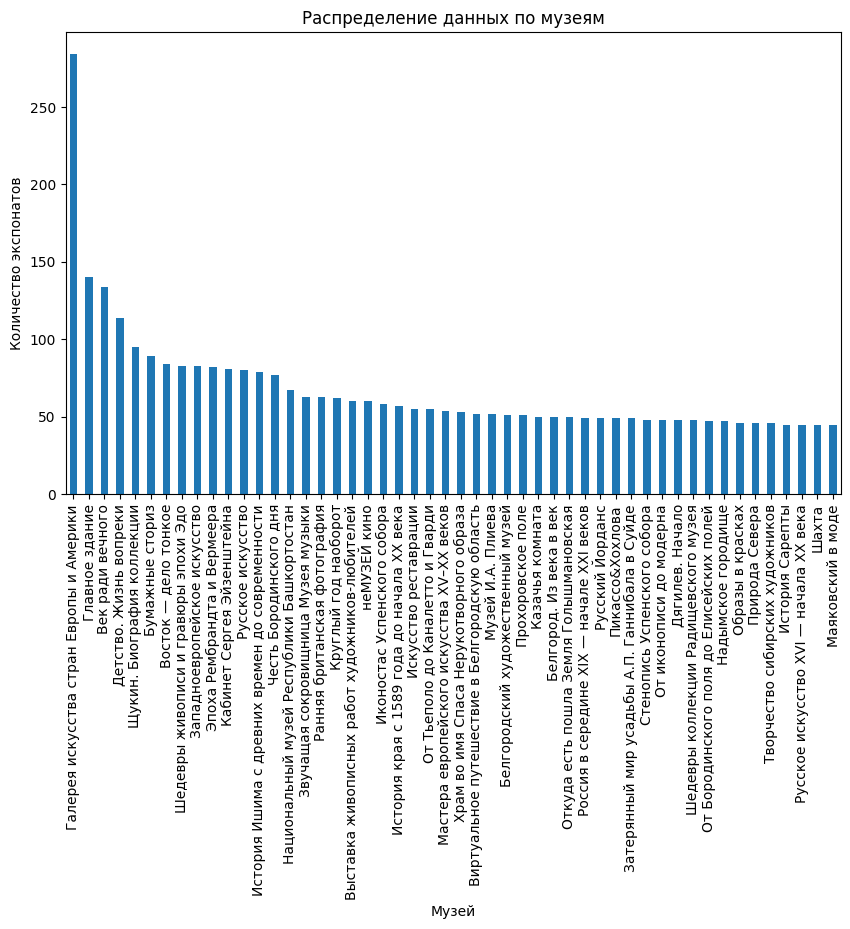

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

museum_counts = artefact_catalog_df['exhibition'].value_counts()[:50]

# Визуализация распределения по музеям
plt.figure(figsize=(10, 6))
museum_counts.plot(kind='bar')
plt.title('Распределение данных по музеям')
plt.xlabel('Музей')
plt.ylabel('Количество экспонатов')
plt.xticks(rotation=90)
plt.show()

## Распределение данных по экспонатам

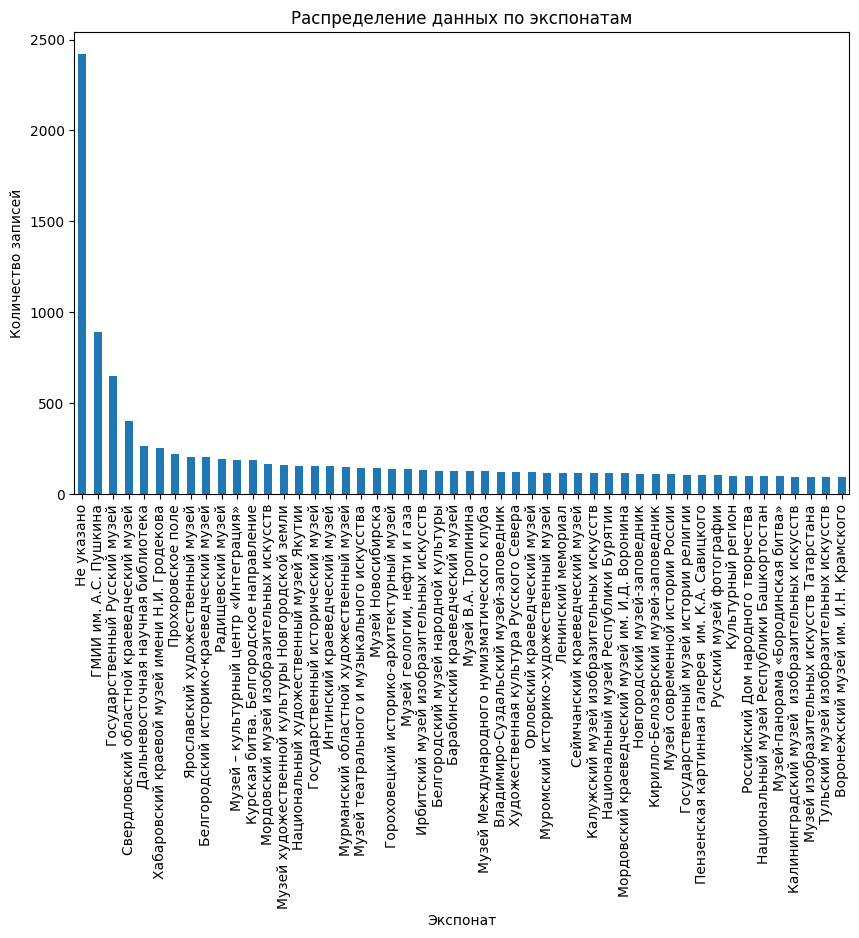

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

exhibit_counts = artefact_catalog_df['collection'].value_counts()[:50]

# Визуализация распределения по музеям
plt.figure(figsize=(10, 6))
exhibit_counts.plot(kind='bar')
plt.title('Распределение данных по экспонатам')
plt.xlabel('Экспонат')
plt.ylabel('Количество записей')
plt.xticks(rotation=90)
plt.show()

## Распределение длины текстов

count    36224.000000
mean       131.451469
std        131.491887
min          0.000000
25%         23.000000
50%         79.000000
75%        256.000000
max       4592.000000
Name: description_length, dtype: float64


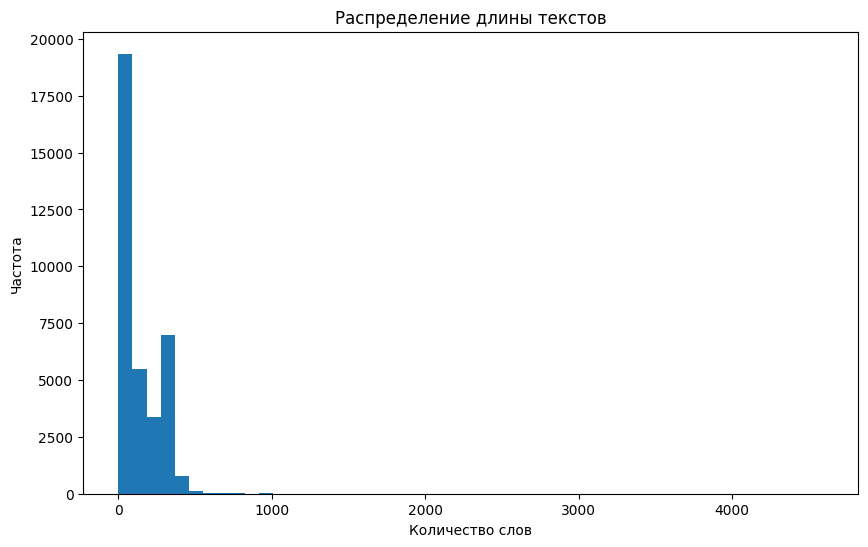

In [19]:
# 4. Статистика по длине текста (описание экспонатов)
artefact_catalog_df['description_length'] = artefact_catalog_df['description'].apply(lambda x: len(str(x).split()))
print(artefact_catalog_df['description_length'].describe())

# Визуализация распределения длины текстов
plt.figure(figsize=(10, 6))
artefact_catalog_df['description_length'].plot(kind='hist', bins=50)
plt.title('Распределение длины текстов')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.show()